<a href="https://colab.research.google.com/github/JoinDeeHub/Generative_AI_Titanic_CaseStudy_Data_Analysis/blob/main/Generative_AI_Titanic_CaseStudy_Data_Analysis_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Analysis – Project Session on Generative AI

In [10]:
# Task 1 – Load the Data
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
print('Shape:', df.shape)
df.head()

Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Task 2 – Basic Statistics
important = ['survived', 'pclass', 'age', 'sibsp', 'parch']

def basic_stats(dataframe, columns):
    import numpy as np, pandas as pd
    out = []
    for col in columns:
        s = dataframe[col].dropna()
        mode_val = s.mode().iloc[0] if not s.mode().empty else np.nan
        out.append({
            'column': col,
            'mean': s.mean(),
            'median': s.median(),
            'mode': mode_val,
            'std_dev': s.std(ddof=1),
            'min': s.min(),
            'max': s.max(),
            'non_null_count': s.shape[0]
        })
    return pd.DataFrame(out)

stats_df = basic_stats(df, important)
stats_df

,column,mean,median,mode,std_dev,min,max,non_null_count
0,survived,0.383838,0.0,0.0,0.486592,0.00,1.0,891
1,pclass,2.308642,3.0,3.0,0.836071,1.00,3.0,891
2,age,29.699118,28.0,24.0,14.526497,0.42,80.0,714
3,sibsp,0.523008,0.0,0.0,1.102743,0.00,8.0,891
4,parch,0.381594,0.0,0.0,0.806057,0.00,6.0,891


In [3]:
# Task 3 – Missing Values & Outliers (IQR)
import pandas.api.types as ptypes
missing_df = df.isna().sum().reset_index()
missing_df.columns = ['column','missing_count']
missing_df.sort_values('missing_count', ascending=False)

def detect_outliers_iqr(dataframe):
    out = []
    for col in dataframe.columns:
        if ptypes.is_numeric_dtype(dataframe[col]) and not ptypes.is_bool_dtype(dataframe[col]):
            s = dataframe[col].dropna().astype(float)
            if s.empty:
                out.append({'column': col, 'outlier_count': 0})
                continue
            q1 = s.quantile(0.25)
            q3 = s.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            count = ((s < lower) | (s > upper)).sum()
            out.append({'column': col, 'outlier_count': int(count)})
    import pandas as pd
    return pd.DataFrame(out).sort_values('outlier_count', ascending=False)

outliers_df = detect_outliers_iqr(df)
outliers_df

,column,outlier_count
4,parch,213
5,fare,116
3,sibsp,46
2,age,11
1,pclass,0
0,survived,0


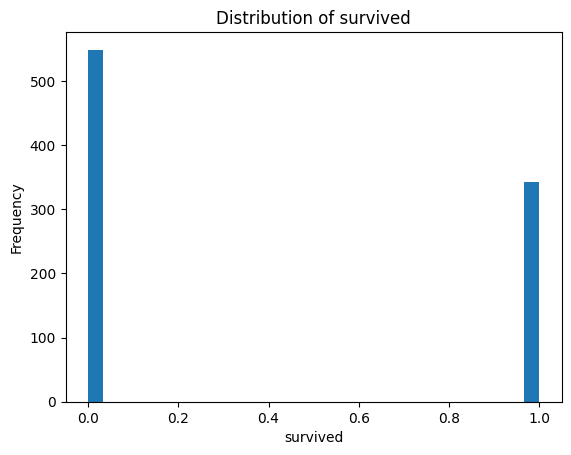

In [4]:
# Task 4 – Univariate Analysis: Histogram
plt.figure()
df['survived'].dropna().plot(kind='hist', bins=30)
plt.title('Distribution of survived')
plt.xlabel('survived')
plt.ylabel('Frequency')
plt.show()

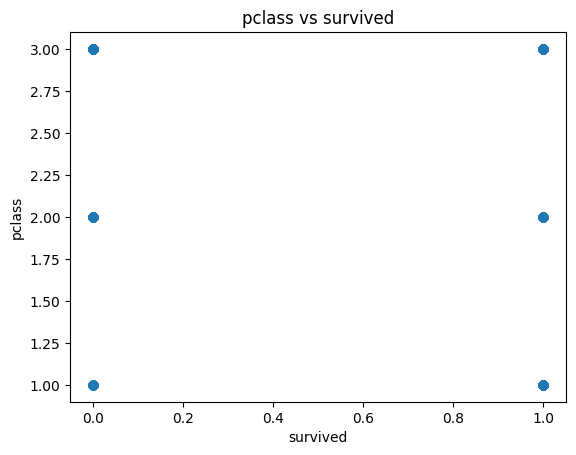

In [5]:
# Task 5 – Bi-variate Analysis: Scatter
plt.figure()
plt.scatter(df['survived'], df['pclass'])
plt.title('pclass vs survived')
plt.xlabel('survived')
plt.ylabel('pclass')
plt.show()